In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

c:\Users\acer\Deskto\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data =pd.read_csv("/kaggle/input/black-friday-sales-prediction/train.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/black-friday-sales-prediction/train.csv'

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# statistical info 
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

****Exploratory Data Analysis****

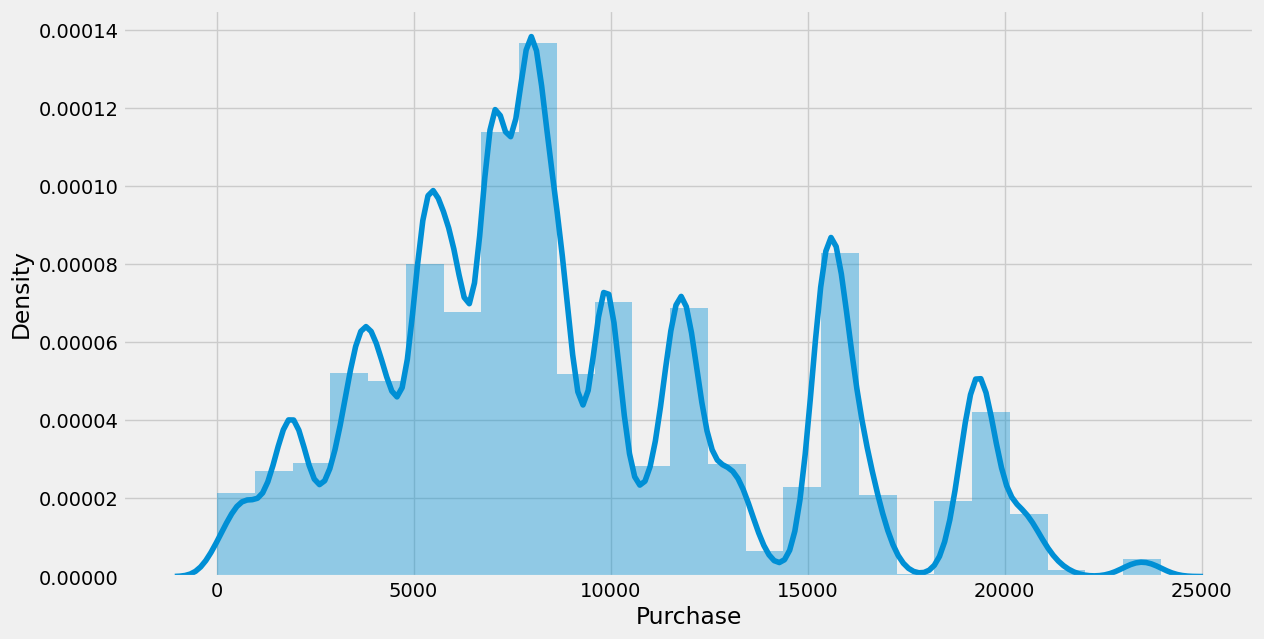

In [ ]:
# distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(data['Purchase'], bins=25)
plt.show()

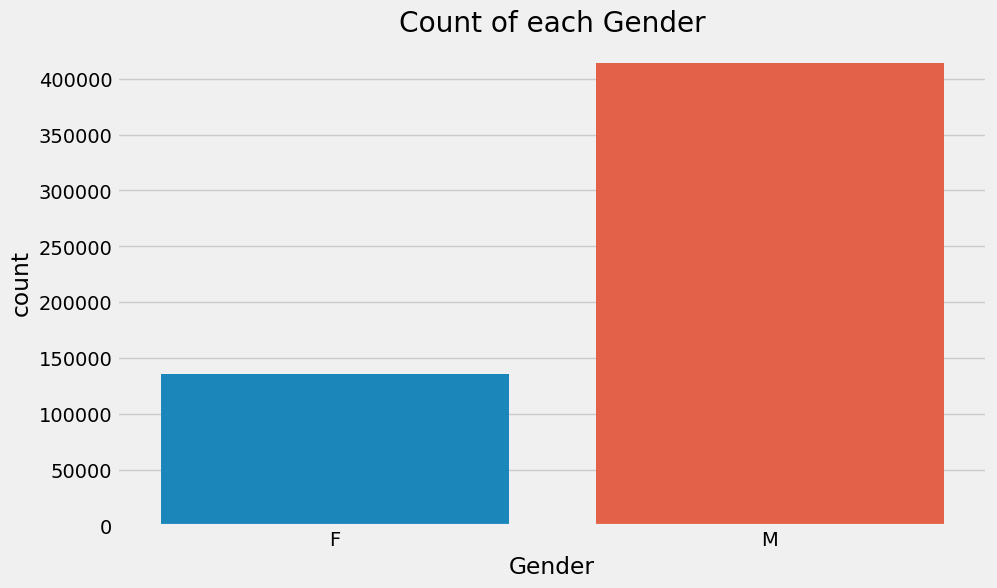

In [ ]:

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(data, x='Gender')

plt.title('Count of each Gender')
plt.show()

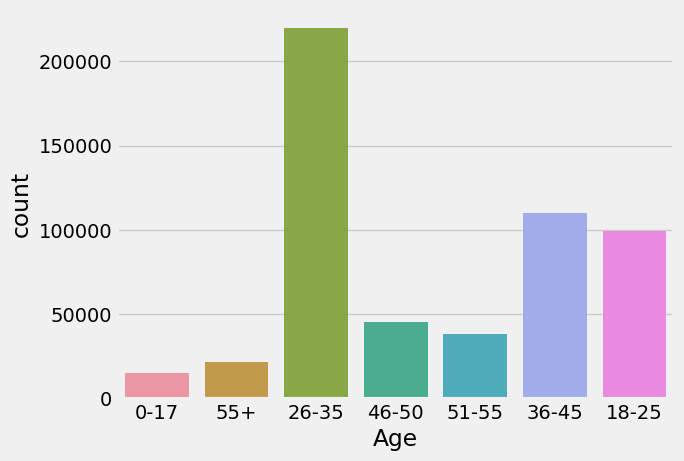

In [ ]:
sns.countplot(data,x='Age')
plt.show()

<Axes: xlabel='Occupation', ylabel='count'>

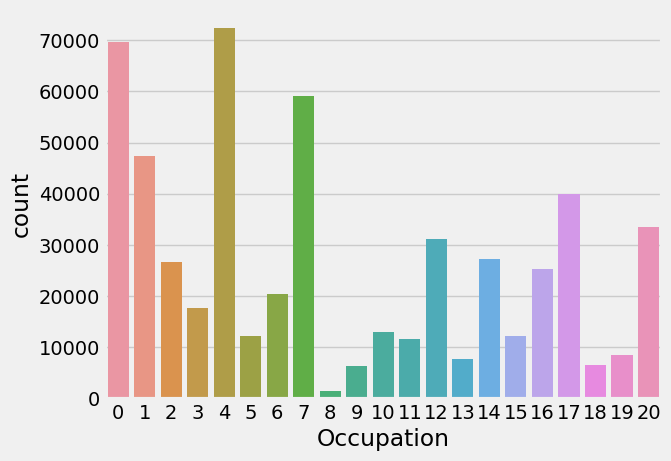

In [ ]:
sns.countplot(data,x='Occupation')

Simple conclusion : that sns.countplot(data[feature]) works just when the feature dtype= float and with one class 

<Axes: xlabel='Product_Category_1', ylabel='count'>

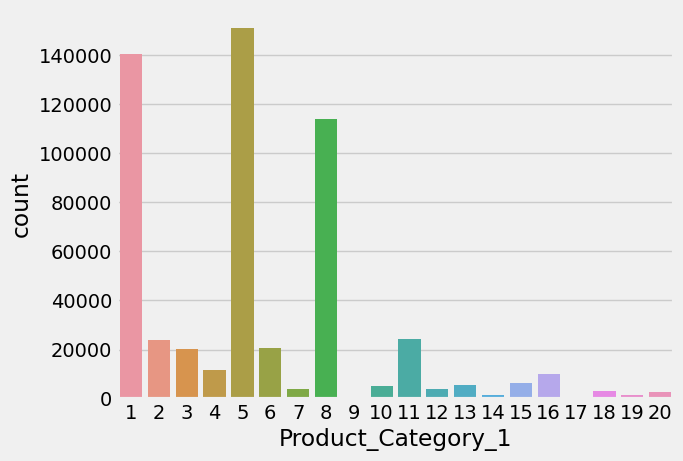

In [ ]:
sns.countplot(data,x='Product_Category_1')

<Axes: xlabel='Product_Category_2', ylabel='count'>

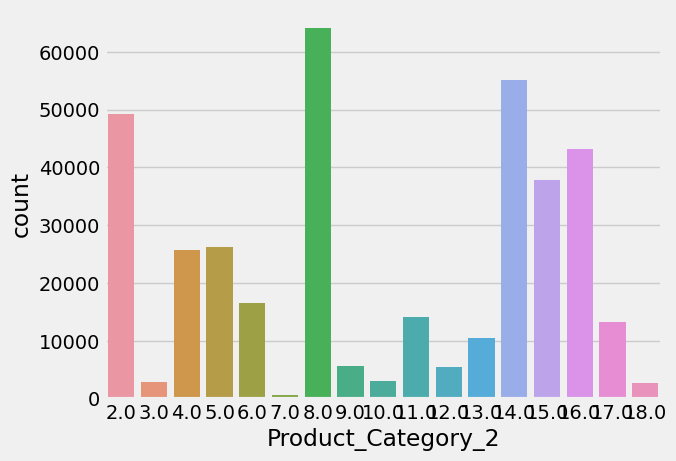

In [ ]:
sns.countplot(data,x='Product_Category_2')

<Axes: xlabel='Product_Category_3', ylabel='count'>

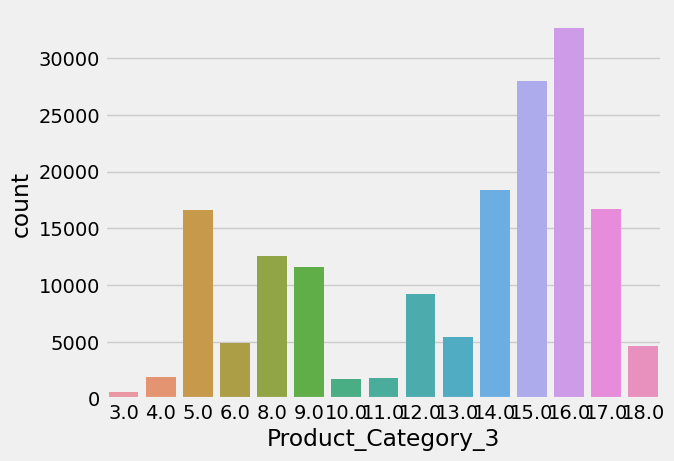

In [ ]:
sns.countplot(data,x='Product_Category_3')

<Axes: xlabel='City_Category', ylabel='count'>

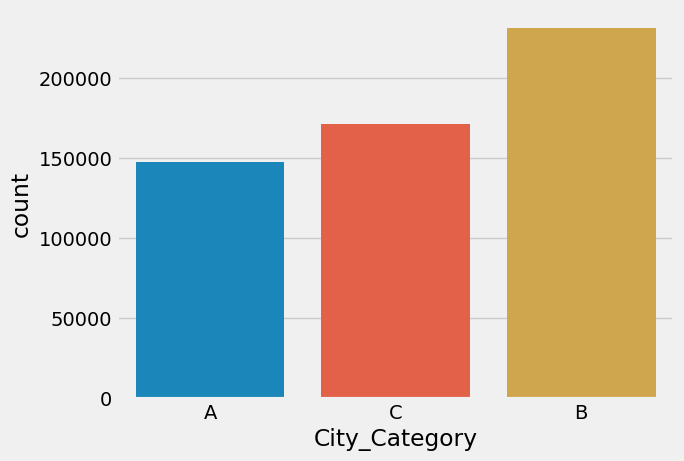

In [ ]:
sns.countplot(data ,x='City_Category')

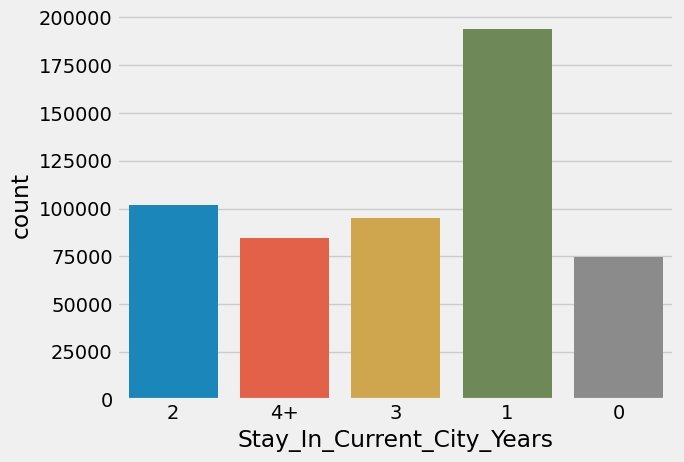

In [ ]:
sns.countplot(data ,x='Stay_In_Current_City_Years')
plt.show()

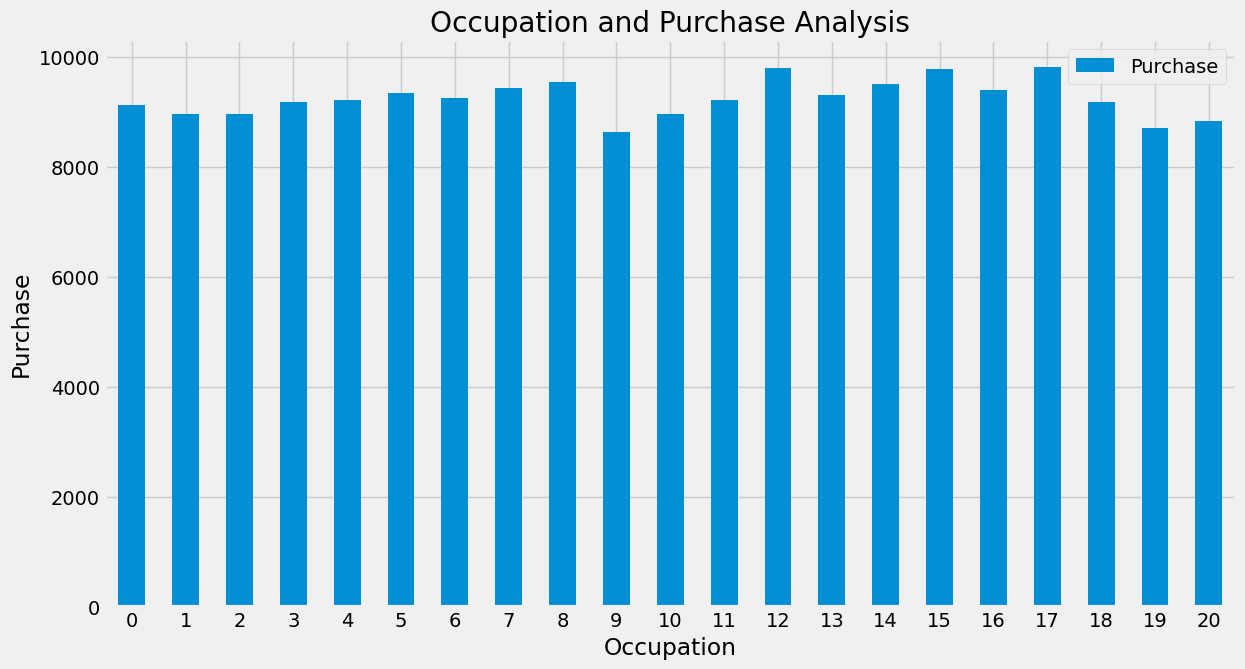

In [ ]:
# bivariate analysis
occupation_plot = data.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

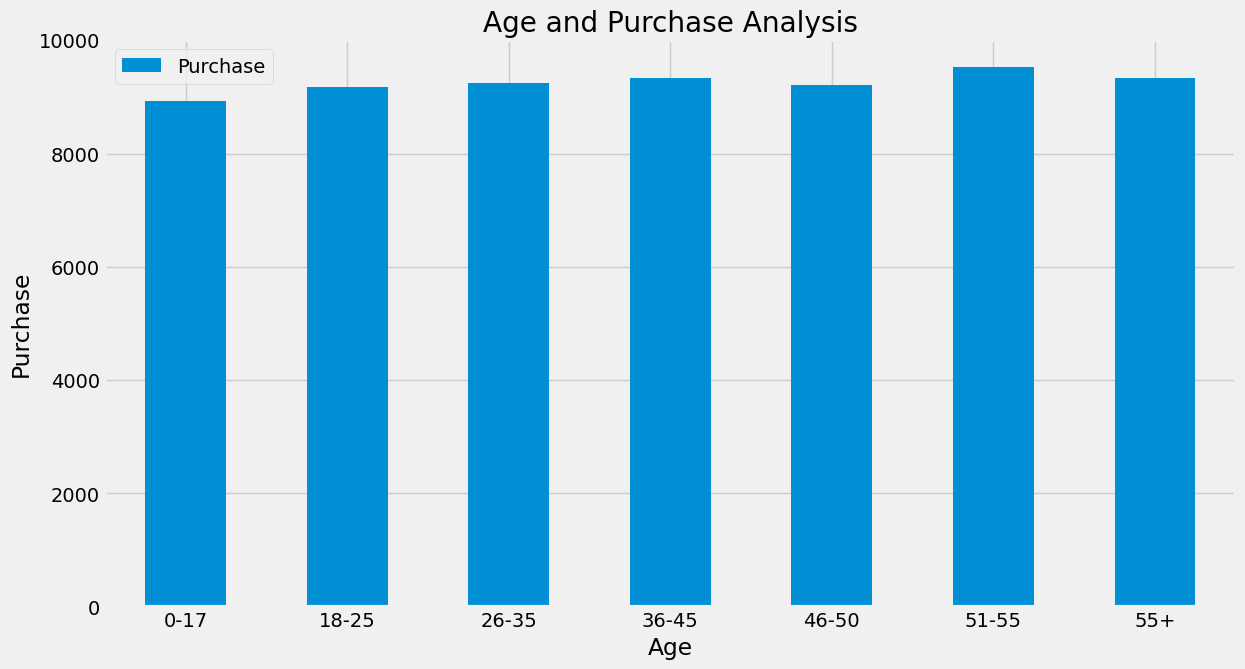

In [ ]:
age_plot = data.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

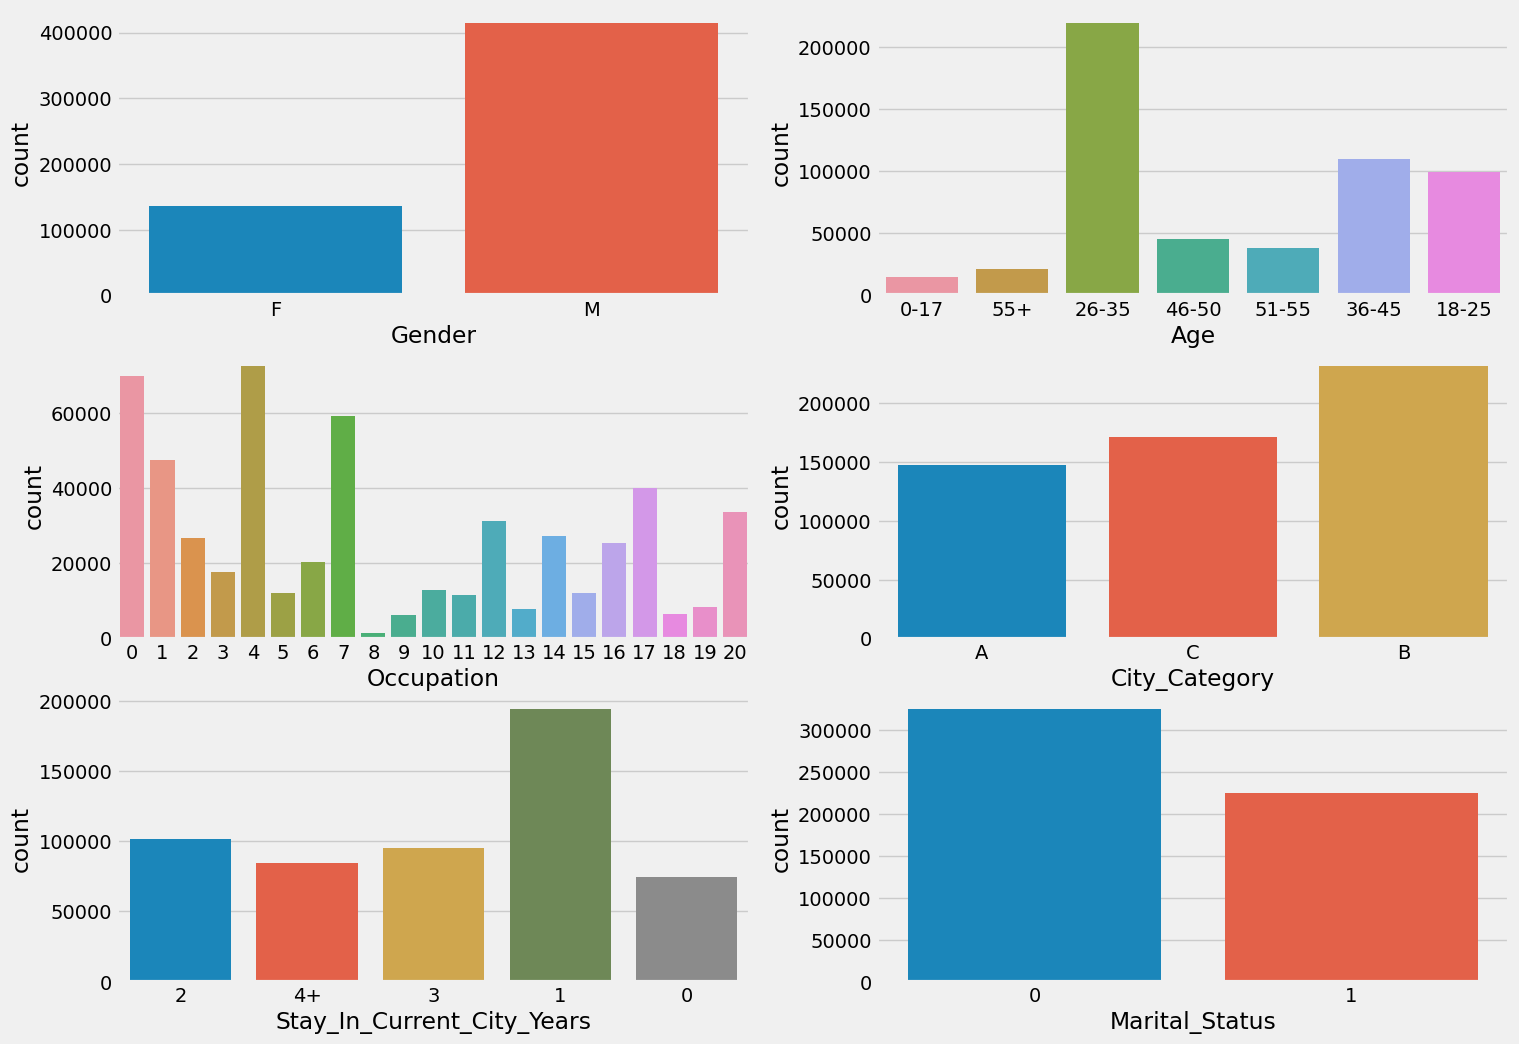

In [ ]:
columns = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status','Purchase']
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(16, 12))
sns.countplot(data=data,x='Gender',ax=axes[0,0])
sns.countplot(data=data,x='Age',ax=axes[0,1])
sns.countplot(data=data,x='Occupation',ax=axes[1,0])
sns.countplot(data=data,x='City_Category',ax=axes[1,1])
sns.countplot(data=data,x='Stay_In_Current_City_Years',ax=axes[2,0])
sns.countplot(data=data,x='Marital_Status',ax=axes[2,1])
plt.show()

As we can see that on this few observation highest sale from the age group between 26-35,

In [ ]:
corr = data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

ValueError: could not convert string to float: 'P00069042'

Pandas is designed to calculate the correlation between numeric columns : u remember this ?

In [ ]:
# check for null values
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
data['Product_Category_2' ].count()

376430

In [ ]:
data.isnull().sum()/len(data)*100 # 

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [ ]:
data['Product_Category_3'].mode()[0].astype(int)

16

In [ ]:
data['Product_Category_2'].mode()[0].astype(int)

8

In [ ]:
#Here Product_category 3 has null percent approx equal to 70 we can drop it or impute it with mode values

#df.drop(['Product_Category_3'],axis=1,inplace=True)
data['Product_Category_3']=data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0]).astype(int)

In [ ]:
#Imputing values for Product_category 2 using mode.

data['Product_Category_2']=data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0]).astype(int)

In [ ]:
#showing data after imputation
data.isnull().sum()/len(data)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

#Finding and Treating Outliers

In [ ]:
out_cols=['Occupation','Product_Category_1','Purchase']

In [ ]:
def find_outliers(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    LL = q1 - (1.5 * IQR)
    UL = q3 + (1.5 * IQR)
    #outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    ul_count=data[data>UL].shape[0]
    ll_count=data[data<LL].shape[0]
    outlier_count = ul_count + ll_count
    outlier_perc=(outlier_count/len(data))*100
    return outlier_perc

In [ ]:
outlier_list=[]
res=0
for col in out_cols:
    val=data[col]
    res=find_outliers(val)
    outlier_list.append([col,res])
print(outlier_list)

[['Occupation', 0.0], ['Product_Category_1', 0.7549975639375496], ['Purchase', 0.4866671029763593]]


In [ ]:
# Removing the outlier for purchase column
q1=data['Purchase'].quantile(0.25)
q3=data['Purchase'].quantile(0.75)
iqr=q3-q1
UL=q3+1.5*iqr
LL=q1-1.5*iqr
data.loc[data['Purchase']>UL,col]=UL
data.loc[data['Purchase']<LL,col]=LL

<Axes: xlabel='Purchase'>

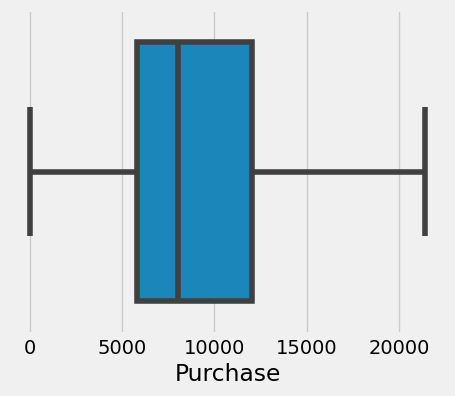

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(data=data,x=data['Purchase'])

In [ ]:
df=pd.get_dummies(data['City_Category'])

In [ ]:
df

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
data = pd.get_dummies(data)
data.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID_P00000142,Product_ID_P00000242,Product_ID_P00000342,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,10,0,3,8,16,8370.0,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,1000001,10,0,1,6,14,15200.0,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,1000001,10,0,12,8,16,1422.0,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,1000001,10,0,12,14,16,1057.0,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,1000002,16,0,8,8,16,7969.0,False,False,False,...,False,True,False,False,True,False,False,False,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler , Normalizer

In [ ]:
scaler = StandardScaler()

In [ ]:
data_scaled= pd.DataFrame(scaler.fit_transform(data),columns=[data.columns])

NameError: name 'pd' is not defined

In [ ]:
data_scaled